In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from spectral_cube import SpectralCube
import astropy.units as u
from astropy.utils import data
from astropy.io import fits
import  aplpy
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from regions import PixCoord, LineSkyRegion, LinePixelRegion

In [3]:
#File Imports

image_file_b = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_02_12co_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_02_12co_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

length_lines = 5.75 #arcsec, length of the segments that are going to be drawn
pa_blue,pa_red,op_angle_blue, op_angle_red = [73, 99, 72.59, 110.5] #enter manually de PA for the blue and red lobe as and the opening angles for blue and red in deg4

blue_direction,red_direction=['west','east']

277.34754166666664 -1.648811111111111
158.9331764567587 154.85423474067397
198.20997890796556 142.8461111617493


ValueError: Unrecognized marker style 'none'

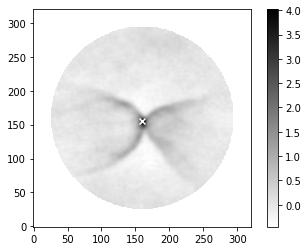

In [4]:
#From Sky Coordinates to Pixel Coordinates x_source, y_source
f = fits.open(image_file_b)
image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

sky = SkyCoord('18 29 23.41 -1 38 55.72', unit=(u.hourangle, u.deg))
print(sky.ra.deg, sky.dec.deg)
x_source, y_source = w.world_to_pixel(sky)
print(x_source,y_source)
#Plotting figure
plt.imshow(image_datar+image_datab,origin='lower',cmap='binary')
plt.colorbar()
plt.scatter(x_source, y_source, marker="x", color="white", label="RA/Dec Mark")


#Position angle derived from fit in degrees
#if red_direction=='east' and pa_red<0:
#    pa_red=90+pa_red

#if blue_direction=='east' and pa_blue<0:
#    pa_blue=90-pa_blue
    
if blue_direction=='west' and pa_blue>0 :
    pa_blue=pa_blue+180
    
if red_direction=='west' and pa_red>0:
    pa_red=180+pa_red
    
angles_b = np.array([pa_blue, pa_blue - op_angle_blue/2., pa_blue + op_angle_blue/2.]) +90.
angles_r = np.array([pa_red, pa_red - op_angle_red/2., pa_red + op_angle_red/2.]) +90.
#position_angle = np.round(84,2)
#length_lines = length_lines/3600. #to degrees (image_header_b['CDELT2']*3600)
length_lines = length_lines/(image_header_b['CDELT2']*3600)


#print(image_header_b['CDELT2']*3600)
# dec_pix_b = np.sin(np.deg2rad(angles_b))*length_lines + sky.dec.deg
# ra_pix_b = -np.cos(np.deg2rad(angles_b))*length_lines*np.sin(np.deg2rad(sky.dec.deg)) +sky.ra.deg
# dec_pix_r = np.sin(np.deg2rad(angles_r))*length_lines + sky.dec.deg
# ra_pix_r = -np.cos(np.deg2rad(angles_r))*length_lines*np.sin(np.deg2rad(sky.dec.deg)) + sky.ra.deg


dec_pix_b = np.sin(np.deg2rad(angles_b))*length_lines + y_source
ra_pix_b = np.cos(np.deg2rad(angles_b))*length_lines + x_source
dec_pix_r = np.sin(np.deg2rad(angles_r))*length_lines + y_source
ra_pix_r = np.cos(np.deg2rad(angles_r))*length_lines + x_source

line_styles = ['dashed', 'solid', 'solid']

#print(int(ra_pix),int(dec_pix))
#x2=ra_pix+x_source
#y2=dec_pix+y_source

#print(length_lines)
#dec_pix =

#Loop through header axes to find a point where the angle is equal to P.A and draw a line to that point from source
# for i in range(image_header_b['NAXIS2']):
#     for j in range(image_header_b['NAXIS1']):
#         y = i-y_source
#         x = j-x_source
#         #if x ==0:
#             #pass
#             #angle = np.round(-np.arctan(np.inf)/np.pi*180)
#         #if:
#         angle = np.round(-np.arctan(y/x)/np.pi*180, 2)
#         #print(f"Angle: {angle}, Position Angle: {position_angle}")
#         #print(angle)
#         if np.allclose(angle, position_angle, atol=1e-5):
#             x2 = x
#             y2 = y

# print(x2,y2)
for i in range(len(angles_b)):
    print(ra_pix_b[i], dec_pix_b[i])
#    plt.scatter(sky.ra.deg,sky.dec.deg, ra_pix_b[i], dec_pix_b[i], marker = 'o')
#    plt.plot([sky.ra.deg,ra_pix_b[i]], [sky.dec.deg, dec_pix_b[i]], marker = 'o')
    plt.plot([x_source,ra_pix_b[i]], [y_source,dec_pix_b[i]], marker = 'none', color = 'blue', linestyle = line_styles[i])
    plt.plot([x_source,ra_pix_r[i]], [y_source,dec_pix_r[i]], marker = 'none', color = 'red', linestyle = line_styles[i])

  #region_pix = LinePixelRegion(start=PixCoord(x=x_source, y=y_source), end=PixCoord(x=ra_pix_b[i], y=dec_pix_b[i]))
#plt.scatter(x2, y2, marker="x", color="blue")#, label="RA/Dec Mark")

#  patch = region_pix.as_artist(edgecolor='blue',ls=line_styles[i])
#  plt.gca().add_patch(patch)

# for i in range(len(angles_r)):
#   region_pix = LinePixelRegion(start=PixCoord(x=x_source, y=y_source), end=PixCoord(x=ra_pix_r[i], y=dec_pix_r[i]))
# #plt.scatter(x2, y2, marker="x", color="blue")#, label="RA/Dec Mark")

#   patch = region_pix.as_artist(edgecolor='red',ls=line_styles[i])
#   plt.gca().add_patch(patch)
plt.scatter(x_source, y_source, marker="x", color="white", label="RA/Dec Mark")
plt.show()

#It gives the output I sent in the mail but on changing the angle values they are not correct
#I have not been successful in plotting the outflow angle on either side of this Position angle line plotted.